<a href="https://colab.research.google.com/github/Neuro-Algorithm/Alzheimers-Prediction/blob/main/Alzheimer%E2%80%99s_Disease_Exploratory_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')




In [6]:
Alzeheimer = pd.read_csv('/content/alzheimers_disease_data.csv')
Alzeheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
Alzeheimer.shape

(2149, 35)

In [8]:
Alzeheimer.info()

Alzeheimer.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [9]:
Alzeheimer.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [10]:
Alzeheimer['Diagnosis'].value_counts()


,count
Diagnosis,
0,1389
1,760


In [12]:
Alzeheimer.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
sum(Alzeheimer.duplicated())

0

In [15]:
Alzeheimer.corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


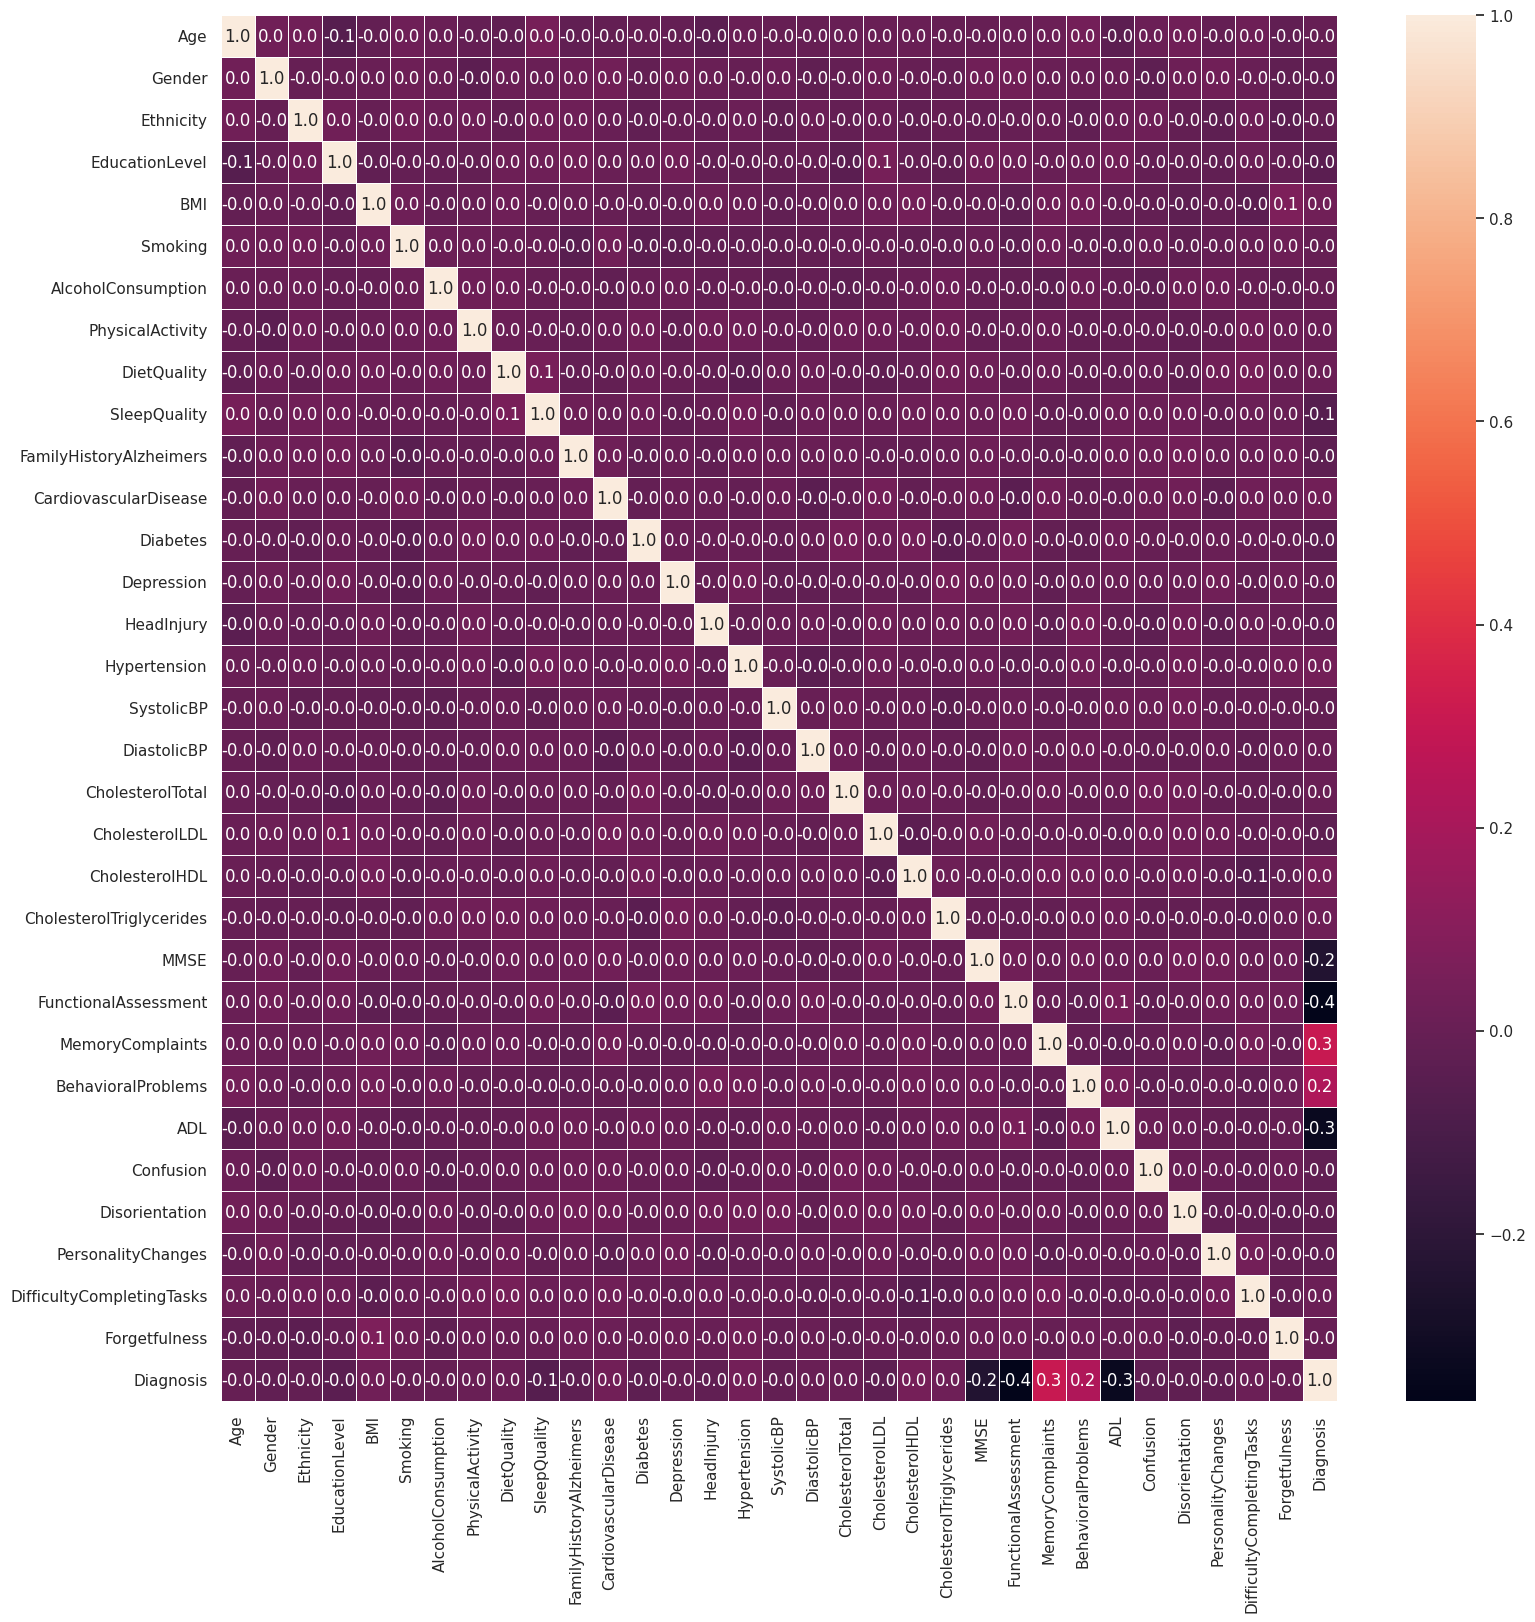

In [19]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(Alzeheimer.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

*Data Visualization*

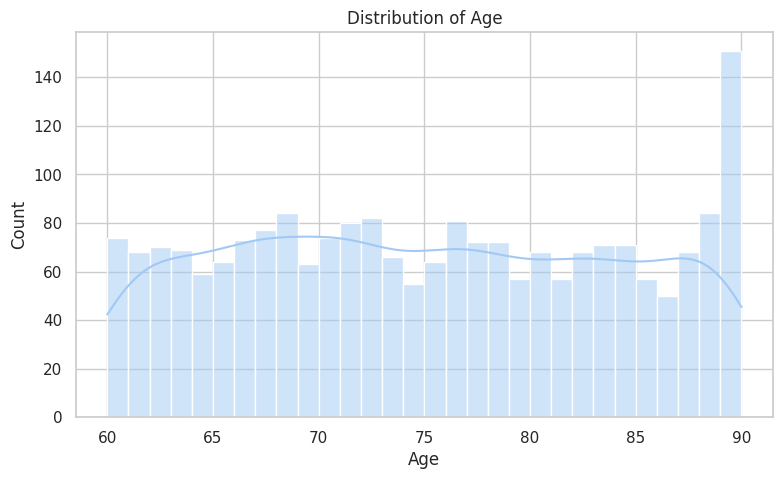

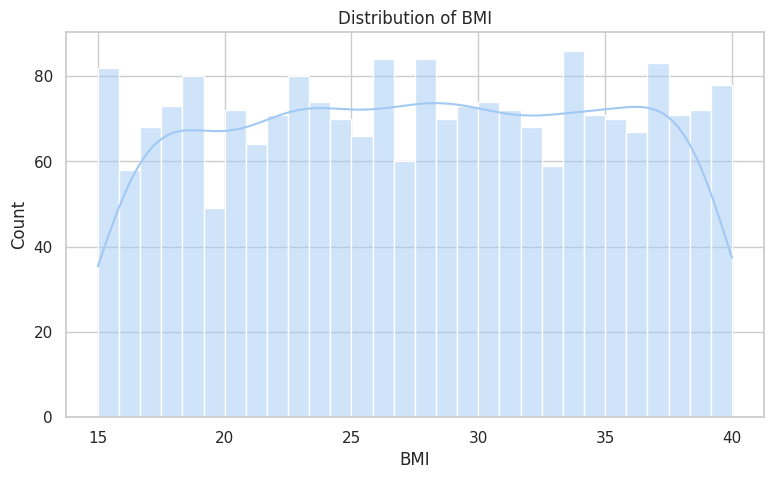

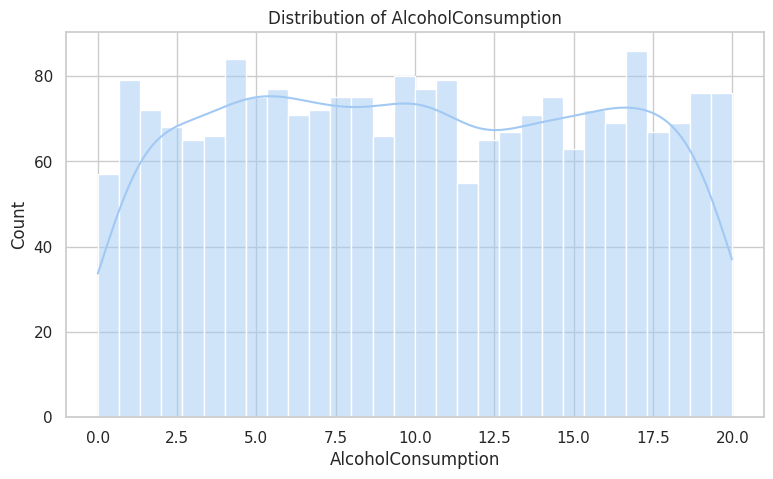

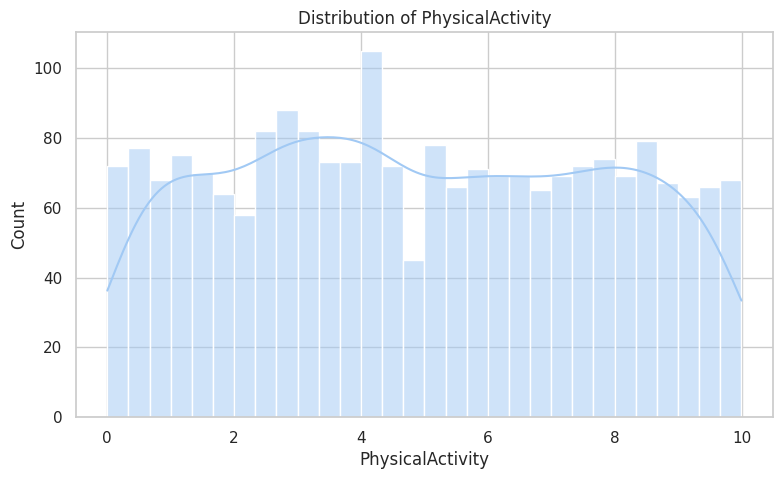

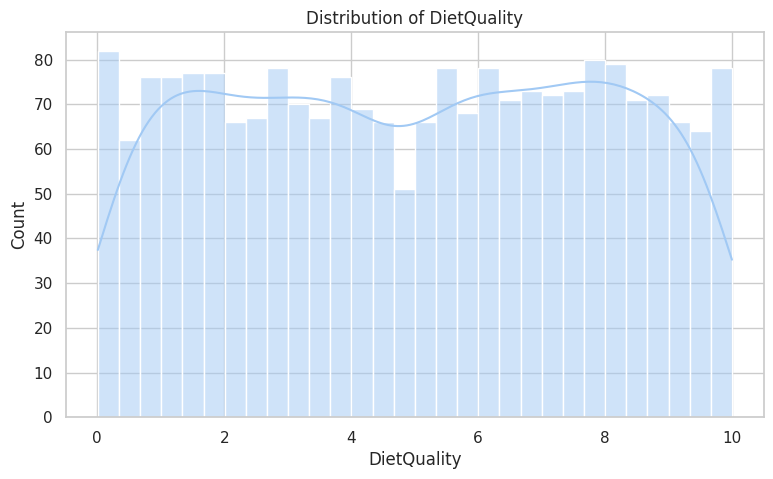

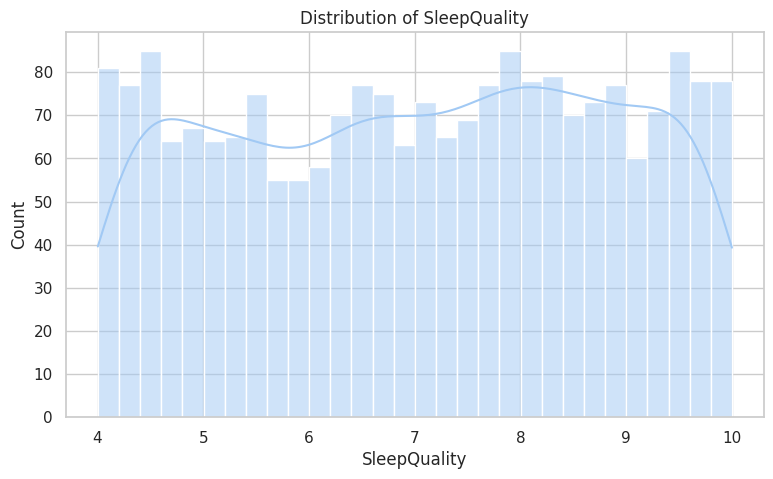

In [20]:
columns_to_plot = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


for column in columns_to_plot:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=Alzeheimer, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

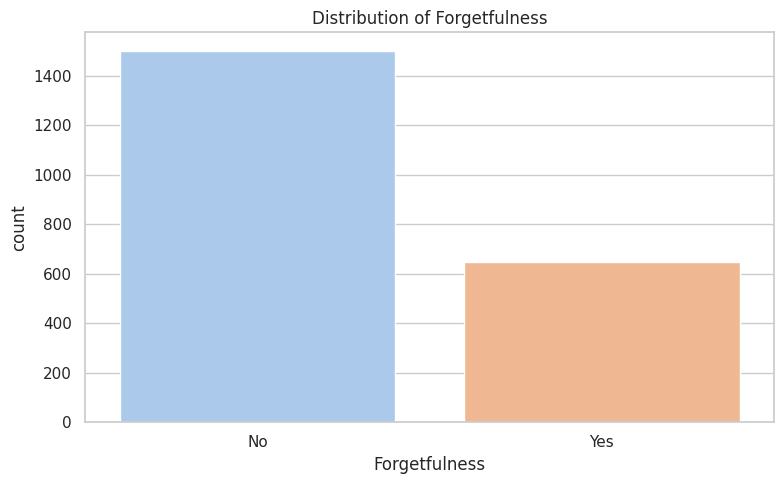

In [22]:
labels = ["No", "Yes"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=Alzeheimer, x='Forgetfulness', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Forgetfulness')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

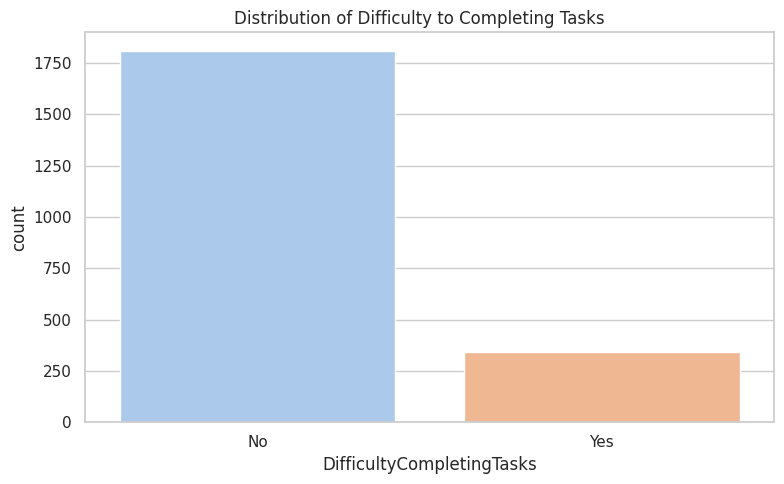

In [23]:

labels = ["No", "Yes"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=Alzeheimer, x='DifficultyCompletingTasks', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Difficulty to Completing Tasks    ')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

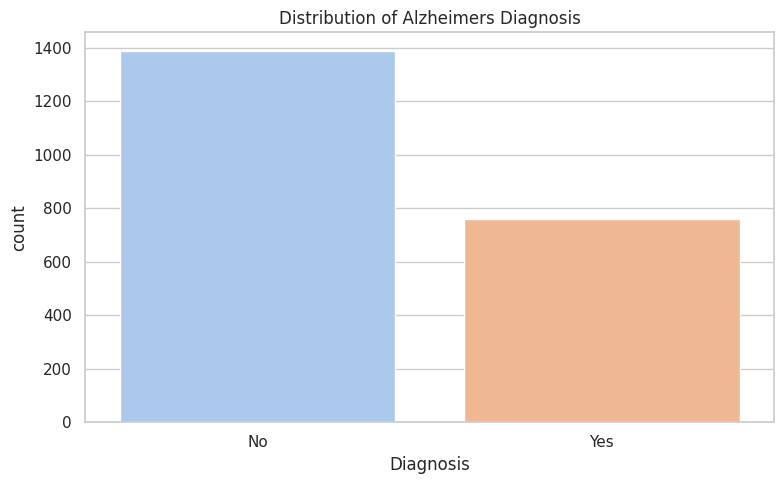

In [24]:
labels = ["No", "Yes"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=Alzeheimer, x='Diagnosis', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Alzheimers Diagnosis')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

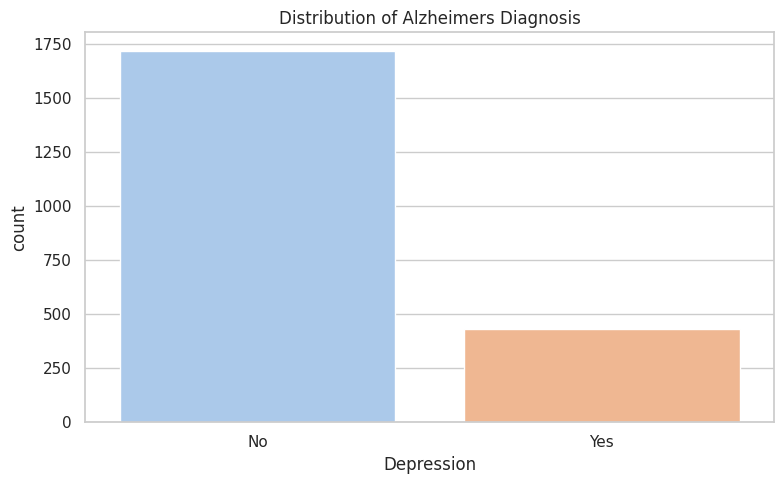

In [26]:
labels = ["No", "Yes"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=Alzeheimer, x='Depression', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Depression')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

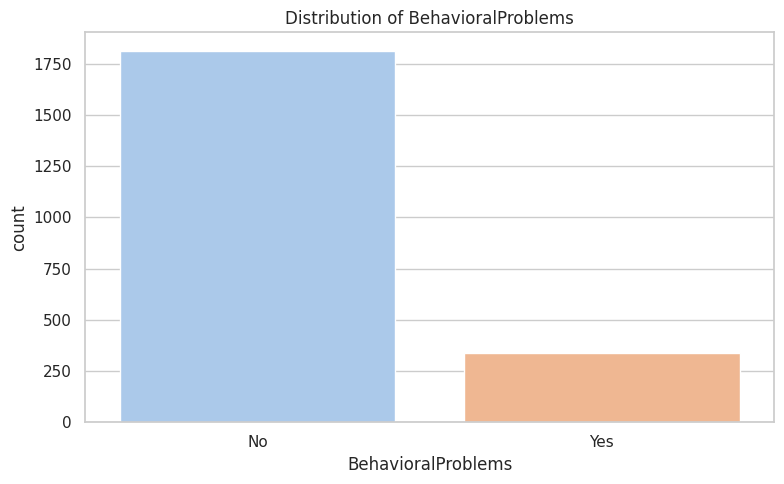

In [27]:
labels = ["No", "Yes"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=Alzeheimer, x='BehavioralProblems', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of BehavioralProblems')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

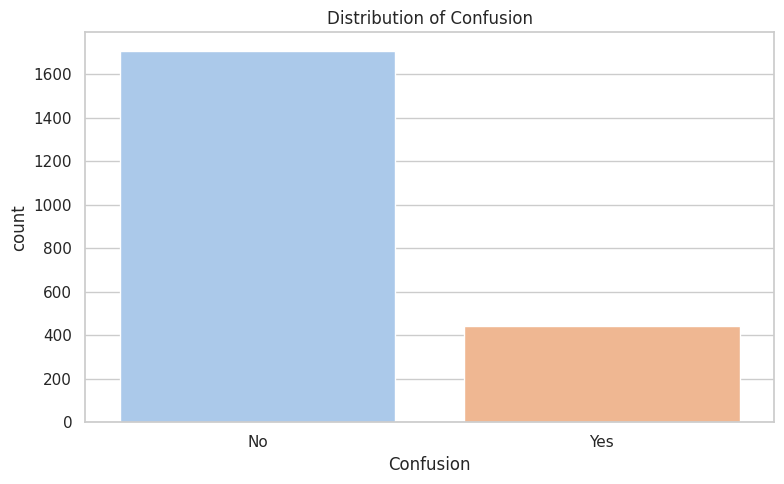

In [29]:
labels = ["No", "Yes"]
ticks = range(len(labels))


fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=Alzeheimer, x='Confusion', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Confusion')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)


plt.tight_layout()
plt.show()

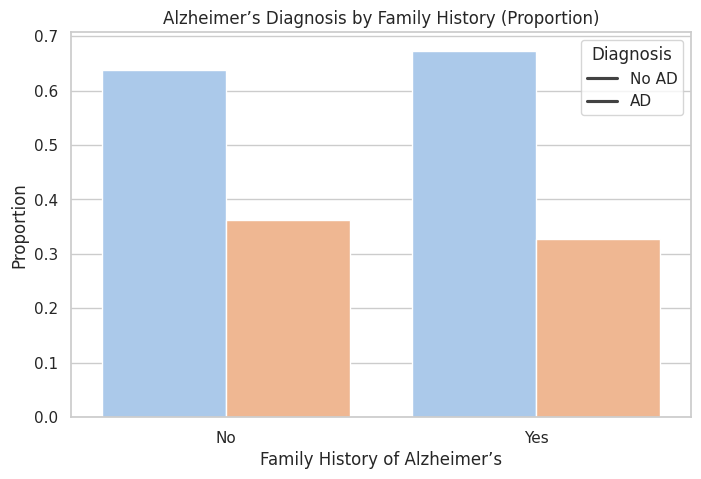

In [30]:
# Calculate proportions
prop_Alzeheimer = (
    Alzeheimer.groupby('FamilyHistoryAlzheimers')['Diagnosis']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=prop_Alzeheimer,
    x='FamilyHistoryAlzheimers',
    y='proportion',
    hue='Diagnosis'
)

plt.title("Alzheimer’s Diagnosis by Family History (Proportion)")
plt.ylabel("Proportion")
plt.xlabel("Family History of Alzheimer’s")
plt.xticks([0,1], ["No", "Yes"])
plt.legend(title="Diagnosis", labels=["No AD", "AD"])
plt.show()


Individuals with a family history of Alzheimer’s disease show a higher proportion of diagnosed cases, consistent with known genetic risk factors.

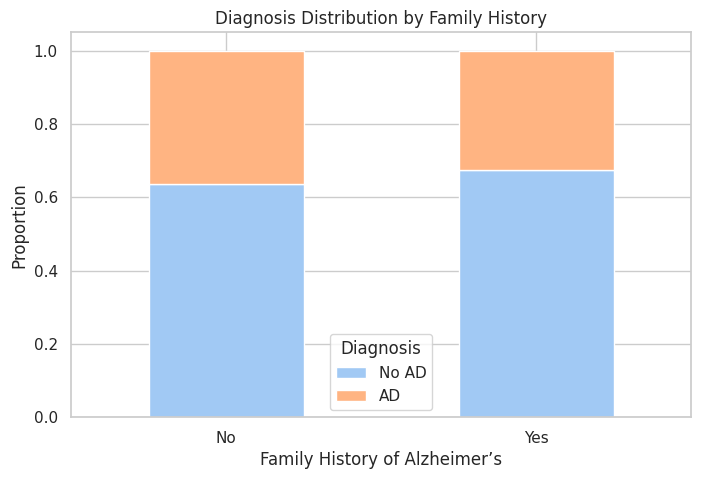

In [32]:
ct = pd.crosstab(Alzeheimer['FamilyHistoryAlzheimers'], Alzeheimer['Diagnosis'], normalize='index')

ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Diagnosis Distribution by Family History")
plt.ylabel("Proportion")
plt.xlabel("Family History of Alzheimer’s")
plt.xticks([0,1], ["No", "Yes"], rotation=0)
plt.legend(["No AD", "AD"], title="Diagnosis")
plt.show()


Family history is associated with a shift toward higher Alzheimer’s prevalence.

Data Pre-processing

In [33]:
X=Alzeheimer.drop('Diagnosis', axis=1)

In [34]:
X.shape

(2149, 32)

In [35]:
y = Alzeheimer['Diagnosis'].copy()

In [36]:
y.shape

(2149,)

Principal Component Analyisis (PCA)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca

array([[ -66.04780538,  -61.62469741,   32.33767979, ...,  -18.36238094,
          -1.89950898,    6.60366203],
       [  66.41091089,   68.47725542,  -10.83043653, ...,  -25.6209268 ,
          13.65823178,    5.86799181],
       [-144.41201662,   41.26782829,   50.09439198, ...,   25.76506805,
          -1.16671386,   -7.12757009],
       ...,
       [  66.71536456,   32.8977297 ,    4.47111011, ...,   27.85809961,
           2.20968698,    3.03774281],
       [ -82.44690565,  -66.58270488,   33.29695444, ...,    5.34524558,
           4.02385731,   -9.92343359],
       [ -11.05124859,  -18.03853513,   64.96979164, ...,  -12.83613509,
          -3.02269517,   -3.60876397]])

In [39]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)



In [40]:
X_pca.shape


(2149, 8)

In [41]:
len(X_train_pca)
len(X_test_pca)


215

In [42]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X_train_pca)


scaled_X_train = scaler.transform(X_train_pca)

In [43]:
scaled_X_train

array([[-0.9187511 , -0.5338062 , -0.1368383 , ..., -1.0020467 ,
        -1.44917345,  0.59953046],
       [ 0.82106034,  0.78796576, -0.85791554, ..., -0.56203807,
        -1.71581087,  0.41444306],
       [ 0.7083352 , -0.05302908, -0.28027666, ...,  0.82659442,
         0.9762924 , -1.37530758],
       ...,
       [-1.63708363,  1.52041689,  1.31331527, ...,  1.57198733,
         1.02540014,  1.67745321],
       [ 1.09397748,  0.10437563, -1.4499762 , ..., -0.74494154,
         1.60094945, -0.92264422],
       [ 1.12207991, -1.10085732, -1.0075129 , ..., -0.95762337,
        -0.32732123, -0.93192632]])

In [44]:
scaled_X_test = scaler.transform(X_test_pca)

In [45]:
scaled_X_test

array([[-0.2193067 , -1.58139855,  0.06827095, ..., -0.77590583,
         1.45990349,  0.0609449 ],
       [ 1.29540121, -0.05185874,  1.62191266, ...,  1.44034501,
         0.10451926,  0.05336472],
       [-0.73311016,  1.79533978,  1.3174726 , ..., -0.40661251,
        -0.16668099, -0.48871802],
       ...,
       [-1.46470681,  0.15658774, -0.5993277 , ..., -0.09485248,
         1.56150476, -0.11727186],
       [ 0.10636859,  0.204259  , -0.72657359, ...,  1.00367386,
         1.42310734, -0.68116687],
       [-0.6564402 ,  0.60955674,  0.59480629, ...,  0.84796135,
         1.69168139,  0.5903015 ]])

Build Model (Neural Network)

In [46]:
import tensorflow as tf
from tensorflow import keras


model_ANN=keras.Sequential([
    keras.layers.Dense(8,input_shape=(8,),activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model_ANN.fit(scaled_X_train,y_train,epochs=70)

Epoch 1/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3672 - loss: 0.7932
Epoch 2/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4234 - loss: 0.7116
Epoch 3/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5472 - loss: 0.6895
Epoch 4/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6780
Epoch 5/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.6699
Epoch 6/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.6635
Epoch 7/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6314 - loss: 0.6673
Epoch 8/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6230 - loss: 0.6674
Epoch 9/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6425 - loss: 0.6586
Epoch 10/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6515 - loss: 0.6547
Epoch 11/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 0.6567
Epoch 12/70
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6315 - lo

In [47]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

 Evaluate the model

In [49]:
y_pred_ANN=model_ANN.predict(scaled_X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [50]:
y_pred_ANN=y_pred_ANN.round().astype(int)

In [51]:
#This is plotting the performance of over all model
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_ANN))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75       142
           1       0.39      0.16      0.23        73

    accuracy                           0.63       215
   macro avg       0.53      0.52      0.49       215
weighted avg       0.57      0.63      0.58       215



In [52]:
cm=confusion_matrix(y_test,y_pred_ANN)
cm

array([[123,  19],
       [ 61,  12]])

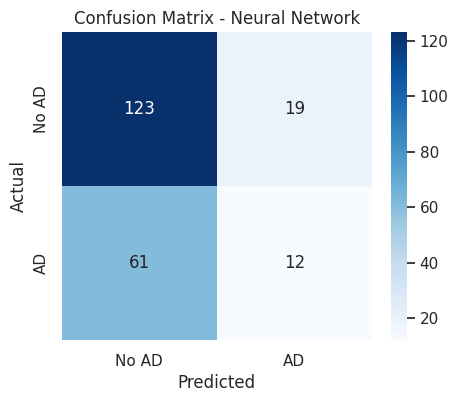

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
ROC-AUC: 0.599122130040517


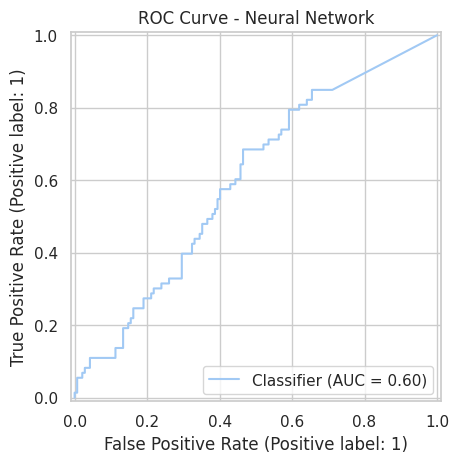

In [54]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay

cm = confusion_matrix(y_test, y_pred_ANN)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AD','AD'], yticklabels=['No AD','AD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# ROC-AUC
y_prob = model_ANN.predict(scaled_X_test).flatten()
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve - Neural Network')
plt.show()


Text(91.25, 0.5, 'Truth')

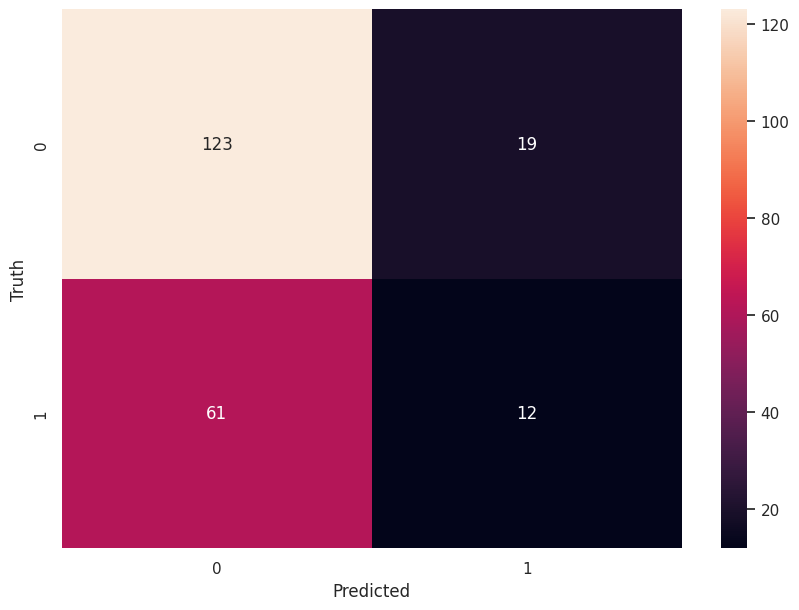

In [55]:
cm1=tf.math.confusion_matrix(y_test,y_pred_ANN)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')